The relation between the radiation fucntion $f(x,y,z)$ at a point P with a field distribution $F(\eta,\nu)$ over the aperture plane of the antenna is given by the equation: 

$$ \Large  f(x,y,z) = \int \frac{F(\xi,\eta)}{4\pi r} e^{-ikr} \left[ \left(ik+\frac{1}{r} \right) \hat{z}\cdot r_1 + ik\hat{z}\cdot\hat{s} \right] d\eta d\xi $$

Where the parameters of the equation are took from the following image:

<center>
<img src="pictures/antenna_holo.png" style="height: 300px; width:300px;">
</center>

## Common approximations
1. $\frac{1}{r}<<< k$
2. $\frac{1}{r} \sim \frac{1}{R}$  outside the bracket
3. The term $\hat{z}\cdot r_1$ can be replaced by $\hat{z}\cdot R = \cos(\theta)$
4. The term $\hat{z}\cdot \hat{s}$ represent the deviation from the uniform phase over the aperture. If the deviation is small the term can be considered to be 1.

With this assumptions the equations is:

$$\Large f(x,y,z) = \frac{i}{2\lambda R}\int F(\xi,\eta)[\cos(\theta)+1]e^{ikr}d\eta d\xi $$
 
 Where $r= \sqrt{(x-\xi)^2+(y-\eta)^2+z^2}$ 

## Far field approximation (Fraunhofer region)
In the far field, R tends to infinity, $R_1$ and $r_1$ are parallel then you could express $r=R-(u\xi+v\eta)$ and for a high gain antenna the interesting region is confined to small values of $\theta$ so it can use $\cos(\theta)=1$. Then the equation is transformed to:

$$\Large f(u,v) = \frac{i}{\lambda}\frac{e^{-ikR}}{R} \int F(\xi,\eta)e^{-ik(\xi u+\eta v)} d\xi d\eta$$


Which is a fourier trannsform in 2-D of the apperture. So given a certain aperture distribution we are able to calculate the far field using the fourier transform.

The oposite is also true, we are able to determine the illumination at the aperture if we measure the beam pattern. If we do that we will obtain a complex illumination $F(\xi,\eta) = A(\xi, \eta)e^{i\phi(\xi,\eta)}$ where the errors of the surface are related with the phase by the equation:

$$\Large \epsilon_n(\xi,\eta) = \frac{\lambda}{4\pi} \phi(\xi,\eta)\sqrt{1+\frac{\xi^2+\eta^2}{4F^2}} $$

Where $\epsilon_n$ is the error normal to the surface and $F$is the foci of the antena. If we disregrard the geometry then the error is given by the Ruze formula:
$$\large \phi = \frac{4\pi}{\lambda}\epsilon$$

## Near Field effects
Most of the assumptions of far field but now we cannot disregard the phase variation over the aperture, leading to the Fresnel difraction integral:
$$\Large \frac{i}{\lambda}\frac{e^{ikR}}{R} \int F(\xi,\eta) exp\left(ik\left[-(u\xi+v\eta)+\frac{\xi^2+\eta^2}{2R}\right]\right)d\xi d\eta$$

In the paper *Near-Field Radio Holography of Large Reflector Antennas* the authors start with this equation and make some approximations to preserve the Fourier transform relation between the aperture currents and the beam pattern.
For that they made the approximation: $$ \large r \approx R-(u\xi+v\eta)+\delta p_1(\xi,\eta)+\epsilon$$
Where $\delta p_1$ contains the terms that does not depend on the integrable variables
$$\delta p_1(\xi,\eta) = \frac{\xi^2+\eta^2}{2R}+\frac{(\xi^2+\eta^2)^2}{8R^3} $$
$$\epsilon = -\frac{(u\xi+v\eta)^2}{2R}+\frac{(\xi^2+\eta^2)(u\xi+v\eta)}{2R^2}$$

To account the defocus of the telescope another term is added to $\delta p_1$: 
$$\delta p_2(\xi, \eta) = (\xi^2+\eta^2+(f-\frac{\xi^2+\eta^2}{4f}+\delta f)^2)^{1/2} - (f+\frac{\xi^2+\eta^2}{4f}+\delta f)$$

Where $f$ is the focal distance of the antenna and $\delta f$ the variation of such distance.



With this approximations the relation can be written as the following equation, where $\epsilon$ modifies the standard Fourier transform:
$$\Large F(\xi, \eta) = \frac{i}{\lambda}\frac{e^{-ikR}}{R} exp\left(-ik[\delta p_1(\xi,\eta)+\delta p_2(\xi, \eta)]\right) \int f(u,v)exp\left(ik(u\xi+v\eta)\right)e^{-ik\epsilon}$$



Depending on the level of accuracy that you want to reach you can neglect some parameters, for example the paper mention that the $\epsilon$ term should be take in account if you want to achieve under $10\mu m$ surface error.

To deal with this term we can make a Taylor expansion over $\epsilon$ and solve the integrals that appear:

$$ e^{-ik\epsilon} \approx 1-ik\epsilon = 1-ik\left[ u \frac{\xi(\xi^2+\eta^2)}{2R^2} + v \frac{\eta(\xi^2
+\eta^2)}{2R^2}-u^2\frac{\xi^2}{2R}-v^2\frac{\eta^2}{2R}-uv\frac{\xi\eta}{R} \right]   $$ 






## Zernike polynomials

Zermike polynomials are a sequence of orthogonal polynomials on the unitary disk.Thery are used to describe different types of aberrations on optics. One advantage of the zernike polynomials is that they can be normalized so the value of each component is proportional to the overall effect on the surface error. 

<center>
<img src="pictures/zermike_pols.png">
</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy import constants


def circular_aperture(d,N, L):
    """
    d = diametre in meters of the aperture
    L = Lenght of the map (should be L>d)
    N = number of points
    """
    y,x = np.meshgrid(np.linspace(-L/2,L/2,N),
                        np.linspace(-L/2,L/2,N))
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    dx = L/N
    illumination = np.ones((N,N))
    illumination[r>d/2] = 0
    return illumination,x,y,r,phi, dx


def cassegrain_aperture(d1, d2, w_spider, N,L):
    """
    d1= diameter of the primary in m
    d2= diameter of the secondary in m
    w_spider: width of the spider that sustain the secondary
    L = size of the MAP
    N = number of points
    """
    illumination,x,y,r,phi,dx = circular_aperture(d1,N,L)
    illumination[r<d2/2] = 0
    illumination[np.abs(x)<w_spider] = 0
    illumination[np.abs(y)<w_spider] = 0
    return illumination,x,y,r,phi, dx

###
### Apex parameters:
### diameter primary: 12
### diameter secondary: 0.75
### spider legs width: ? TODO: CHECK!!!!
### focal length: 4.8
### focal ratio (f/D): 8
###


def apex_aperture(length, pts):
    """
    length: length of the map in meters
    """
    d1 = 12
    d2 = 0.75
    spider_width = 0.1
    mask,x,y,r,phi,dx =  cassegrain_aperture(d1,d2,spider_width, pts,length)
    return mask,x,y,r,phi


def gaussian_2d(x,y,amp, mu_x, mu_y, sigma_x, sigma_y, rot_angle):
    ###calculated rotated parameters
    a = np.cos(rot_angle)**2/(2*sigma_x**2)+np.sin(rot_angle)**2/(2*sigma_y**2)
    c = np.sin(rot_angle)**2/(2*sigma_x**2)+np.cos(rot_angle)**2/(2*sigma_y**2)
    b = np.sin(rot_angle)*np.cos(rot_angle)/2*(1/(sigma_y**2)-1/(sigma_x**2))
    values = amp*np.exp(-(a*(x-mu_x)**2+
                          2*b*(x-mu_x)*(y-mu_y)+
                          c*(y-mu_y)**2))/(2*np.pi**2*sigma_x*sigma_y)
    return values

def gaussian_illumination(length, pts,center=[0,0],sigma=[2,2], rotation=0):
    """
    center: [center_x, center_y]
    sigma: [sigma_x, simga_y]
    """
    x = np.linspace(-length/2, length/2, pts)
    x,y = np.meshgrid(x,x)
    illumination = gaussian_2d(x,y,1,center[0],center[1], sigma[0], sigma[1], rotation)
    illumination /= np.max(illumination)
    return illumination


def add_white_noise(data, SNR):
    snr_lineal = 10**(SNR/20)
    max_val = np.max(np.abs(data))
    noise_amp = max_val/(snr_lineal**.5)
    noise = np.random.normal(size=data.shape)
    if(np.iscomplex(data).any()):
        noise = noise+ 1j*max_val*(snr_lineal**.5)*np.random.normal(size=data.shape)
    noise = noise/(np.max(np.abs(noise)))
    noise = noise_amp*noise
    output = data+noise
    return output

def calculate_snr(data, noise_percentage=5 ,out_type='dB'):
    """
    To calculate the SNR we order the data and take as noise the lower percentage,
    the signal is the maximum of the set
    out_type can be lin or db
    """
    dat_sort = np.abs(data).flatten()
    dat_sort.sort()
    noise = np.mean(dat_sort[:int(data.shape[0]**2*noise_percentage/100)])
    signal = np.max(dat_sort)
    out = signal/noise
    if(out_type=='db'):
        return 20*np.log10(out)
    else:
        return out

def blurry_mask(mask, filter_sigma=5):
    blur_mask = np.copy(mask)
    blur_mask[blur_mask==0] = 1e-55
    out = gaussian_filter(blur_mask, filter_sigma)
    return out


#zerkine polynomials
def zernike_tilt(rho,phi, tx, ty):
    tilt_x = 2*rho*np.cos(phi)
    tilt_y = 2*rho*np.sin(phi)
    out = tx*tilt_x+ty*tilt_y
    return out


def zernike_astigmatism(rho, phi, a_h, a_v):
    zm2p2 = np.sqrt(6)*rho**2*np.sin(2*phi)  ## oblique astigmatism
    zp2p2 = np.sqrt(6)*(rho**2)*np.sin(2*phi)  ## vertical astigmatism
    out = zm2p2*a_h+zp2p2*a_v
    return out

def zernike_defocus(rho, d):
    zp0p2 = np.sqrt(3)*(2*rho**2 -1)          ## defocus
    out = zp0p2*d
    return out


def zernike_coma(rho, phi, c_x, c_y):
    zm1p3 = np.sqrt(8)*(3*rho**3 - 2*rho)*np.sin(phi) ## vertical coma
    zp1p3 = np.sqrt(8)*(3*rho**3 - 2*rho)*np.cos(phi) ## horizontal coma
    out = zm1p3*c_x+zp1p3*c_y
    return out

def zernike_trefiol(rho, phi, t_h, t_v):
    zm3p3 = np.sqrt(8)*rho**3*np.sin(3*phi)   ## vertical trefiol
    zp3p3 = np.sqrt(8)*rho**3*np.cos(3*phi)   ## oblique trefiol
    out = zp3p3*t_h+zm3p3*t_v
    return out


def add_zernike_aberration(illumination, rho, phi, amplitudes):
    """
    rho = r/diameter
    """
    piston = amplitudes[0]
    tilt = zernike_tilt(rho, phi,amplitudes[1], amplitudes[2])
    astigmatism = zernike_astigmatism(rho, phi, amplitudes[3], amplitudes[4])
    defoc = zernike_defocus(rho, amplitudes[5])
    coma = zernike_coma(rho, phi, amplitudes[6], amplitudes[7])
    trefiol = zernike_trefiol(rho, phi, amplitudes[8], amplitudes[9])
    aberration = piston+tilt+astigmatism+defoc+coma+trefiol
    out = illumination*np.exp(1j*aberration)
    return out 

###
def add_near_field_effect(illumination,r, wavelength, distance):
    p1 = r**2/(2*distance)-r**4/(8*distance**3)
    out = illumination*np.exp(-1j*2*np.pi/wavelength*p1)
    return out

def add_defocus_effect(illumination, r, focal_distance, defocus, wavelength):
    f = focal_distance
    df = -defocus
    p2 = np.sqrt(r**2+(f+df-r**2/(4*f))**2)-(r**2/(4*f)+f+df)
    out = illumination*np.exp(-1j*2*np.pi/wavelength*p2)
    return out



####

def fraunhofer_zone(illumination,wavelength,map_size, pts):
    beam_pattern = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(illumination)))
    dx = map_size/pts
    ang_size = np.rad2deg(wavelength/dx)
    ang_x = np.linspace(-ang_size/2, ang_size/2, pts)
    ang_x, ang_y = np.meshgrid(ang_x, ang_x)
    return ang_x, ang_y, beam_pattern

def calculate_rms_error_ruze(data, mask, wavelength):
    ang = np.angle(data)
    error = wavelength*ang/(4*np.pi)
    error_rms = np.sqrt(np.sum(error[mask.astype(bool)]**2)/np.sum(mask.astype(bool)))
    return error_rms


In [42]:
def plot_maps(illumination, wavelength, map_size, pts,x,y, title=""):
    ang_x, ang_y, beam_pattern = fraunhofer_zone(illumination, wavelength, map_size, pts)
    fig, ax = plt.subplots(2,2)
    
    ax[0,0].pcolormesh(x,y,20*np.log10(np.abs(illumination)+1e-35))
    ax[0,1].pcolormesh(x,y,np.rad2deg(np.angle(illumination)), cmap='twilight')
    ax[1,0].contourf(ang_x,ang_y,20*np.log10(np.abs(beam_pattern)+1e-35), levels=20)
    ax[1,1].pcolormesh(ang_x,ang_y,np.rad2deg(np.angle(beam_pattern)), cmap='twilight')

    ax[0,0].set_xlabel('m')
    ax[0,1].set_xlabel('m')
    ax[0,0].set_ylabel('m')
    ax[0,1].set_ylabel('m')

    ax[1,0].set_xlabel('$\\theta_{x}$ deg')
    ax[1,1].set_xlabel('$\\theta_{x}$ deg')
    ax[1,0].set_ylabel('$\\theta_{y}$ deg')
    ax[1,1].set_ylabel('$\\theta_{y}$ deg')
    fig.suptitle(title)
    fig.tight_layout()
    

In [58]:
##hyperparameters
apex_diameter = 12
freq = 92.4e9           ##hz, freq of the test tone
focal_distance= 4.8
##
map_size = 14           ##this is the map size in the illumination (mts)
pts = 256
##gaussian parameters
center = [0.03,0]
sigma = [1,1.5]#[0.5, 0.2]
rotation_angle =  -10
##
#zernike_amplitudes = np.random.random(10)
zernike_amplitudes = [-0.33839023,  0.96737793, -0.02372336, -0.40177195, -0.00232479,
        1.58546301,  0.93660532, -1.66318549, -0.30556746,  0.36390192]

snr = 30


##tx distance
tx_distance =1800
defocus= -14.8/1000

##
##
tx_distance = tx_distance*(1+(0.5-np.random.random())*0.02) ##add some variations
defocus = defocus*(1+(0.5-np.random.random())*0.02) ##add some variations
wavelength = constants.c.value/freq

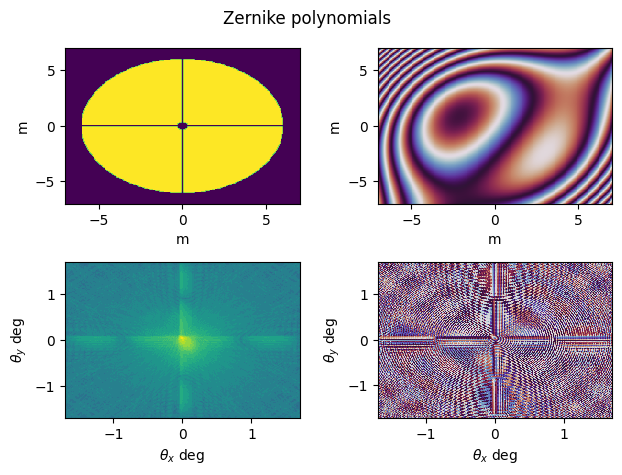

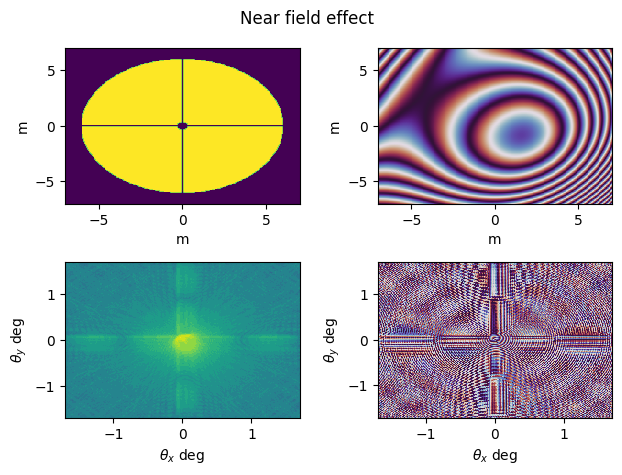

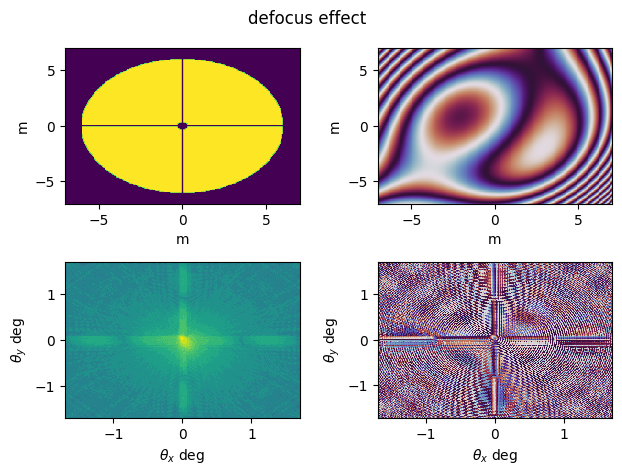

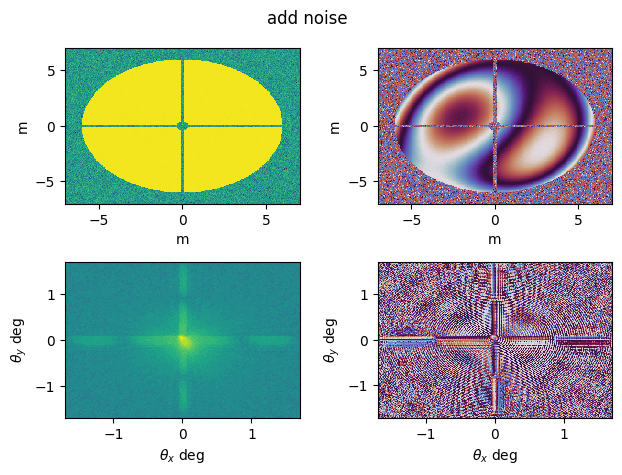

In [59]:
###This is without illumination in the apperture, just the default mask
mask,x,y,r,phi = apex_aperture(map_size, pts)
##generate a smooth mask to avoid discontinuities of the mask
blur_mask = blurry_mask(mask, filter_sigma=0.2)

##zernike pols
rho = r/(apex_diameter/2)
aberrated_illumination = add_zernike_aberration(blur_mask, rho, phi, zernike_amplitudes)
plot_maps(aberrated_illumination, wavelength,map_size, pts,x,y, 'Zernike polynomials')

#add nearfield effec
near_illumination = add_near_field_effect(aberrated_illumination, r, wavelength, tx_distance)
plot_maps(near_illumination, wavelength,map_size, pts,x,y, 'Near field effect')

##add defocus effect
defocus_illumination = add_defocus_effect(near_illumination, r, focal_distance, defocus, wavelength)
plot_maps(defocus_illumination, wavelength,map_size, pts,x,y, 'defocus effect')

##add noise
noisy_illumination = add_white_noise(defocus_illumination, snr)
plot_maps(noisy_illumination, wavelength,map_size, pts,x,y, 'add noise')




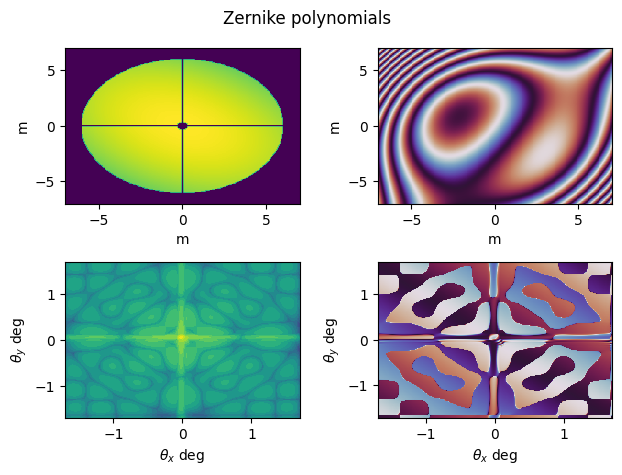

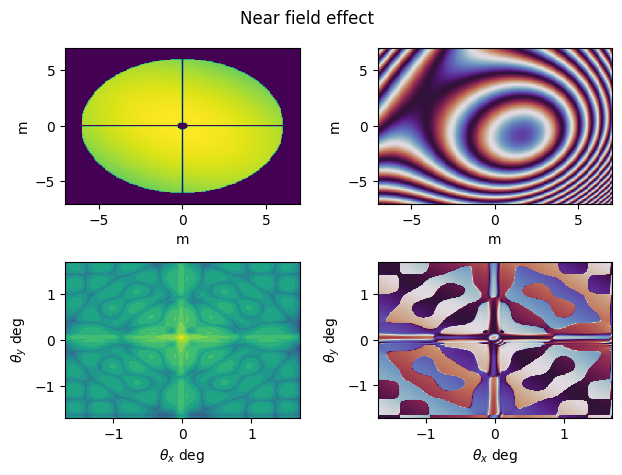

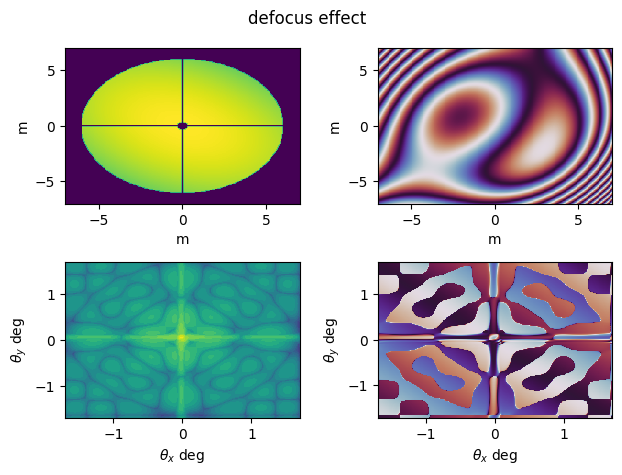

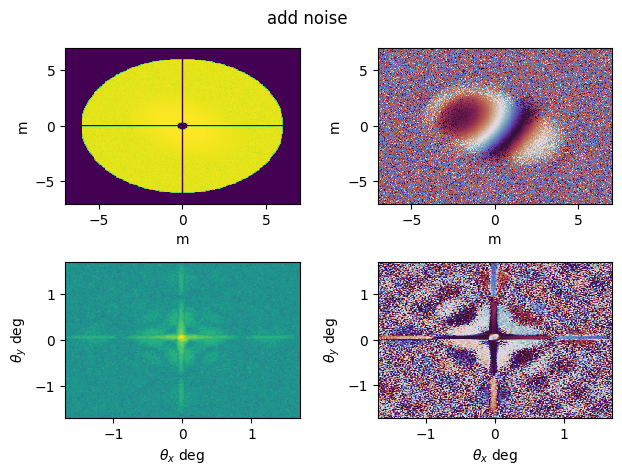

In [60]:
###This is using a gaussian illumination
mask,x,y,r,phi = apex_aperture(map_size, pts)
##generate a smooth mask to avoid discontinuities of the mask
blur_mask = blurry_mask(mask, filter_sigma=0.2)

##
clean_illumination = gaussian_illumination(map_size, pts,center, sigma, rotation_angle)

##zernike pols
rho = r/(apex_diameter/2)
aberrated_illumination = add_zernike_aberration(clean_illumination, rho, phi, zernike_amplitudes)
plot_maps(aberrated_illumination*blur_mask, wavelength,map_size, pts,x,y, 'Zernike polynomials')

#add nearfield effec
near_illumination = add_near_field_effect(aberrated_illumination, r, wavelength, tx_distance)
plot_maps(near_illumination*blur_mask, wavelength,map_size, pts,x,y, 'Near field effect')

##add defocus effect
defocus_illumination = add_defocus_effect(near_illumination, r, focal_distance, defocus, wavelength)
plot_maps(defocus_illumination*blur_mask, wavelength,map_size, pts,x,y, 'defocus effect')

##add noise
noisy_illumination = add_white_noise(defocus_illumination, snr)
plot_maps(noisy_illumination*blur_mask, wavelength,map_size, pts,x,y, 'add noise')